<a href="https://colab.research.google.com/github/SummerLife/EmbeddedSystem/blob/master/MachineLearning/gist/mobilenet_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [8]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

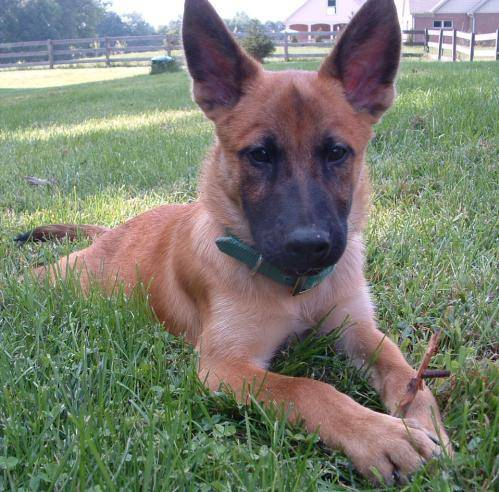

In [20]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/train_data/test/dog/dog.10667.jpg', width=300,height=200) 

In [21]:
preprocessed_image = prepare_image('/content/drive/My Drive/train_data/test/dog/dog.10667.jpg')
predictions = mobile.predict(preprocessed_image)

In [25]:
results = imagenet_utils.decode_predictions(predictions)
print(results)

[[('n02105162', 'malinois', 0.83596694), ('n02106662', 'German_shepherd', 0.13619196), ('n02105412', 'kelpie', 0.014541834), ('n02115641', 'dingo', 0.008195962), ('n02113023', 'Pembroke', 0.0016892769)]]
